In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

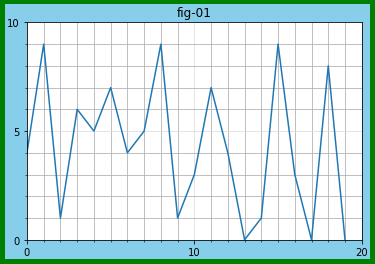

In [249]:
"""基本的なプロット
figsize     ：Figureのサイズ。横縦を(float, float)で指定。
dpi         ：整数で指定。Figureのピクセルサイズ=figsize×dpi
facecolor   ：図の背景色。Jupyterだと透過色になってたりする。
linewidth   ：図の外枠の太さ。デフォルトは0（枠なし）。
edgecolor   ：図の枠の色。linewidthを指定しないと意味ない。
subplotpars ：AxesSubplotの基準を指定する。
tight_layout：Trueにするとオブジェクトの配置が自動調整される。
"""
fig = plt.figure(figsize=(6, 4), dpi=72,
                 facecolor='skyblue', linewidth=10, edgecolor='green')
ax = fig.add_subplot(111)
ax.plot([np.random.randint(0, 10) for i in range(20)])
ax.set_title('fig-01')
ax.set_xlim(0, 20)
ax.set_ylim(0, 10)

# グリッドの表示例
ax.set_xticks(np.linspace(0, 20, 3))  # 主目盛
ax.set_xticks(np.linspace(0, 20, 21), minor=True)  # 副目盛
ax.set_yticks(np.linspace(0, 10, 3))
ax.set_yticks(np.linspace(0, 10, 11), minor=True)
ax.grid(which="minor")
ax.grid(c='gainsboro', zorder=9)  # zorderの設定は折れ線参照
ax.set_axisbelow(True)  # グリッドを背面表示
              
plt.show()
plt.close()
# fig.savefig('1-1_a.png', facecolor=fig.get_facecolor(), edgecolor=fig.get_edgecolor())

In [270]:
"""Axesの作成
Axesが1つ ⇒ Figure.add_subplot(111)
同じ大きさのAxesを並べる ⇒ Figure.add_subplot()
いろいろな大きさのAxesを並べる ⇒ GridSpec
グラフの大きさ、位置を自由に決めたい ⇒ Figure.add_axes()
"""

'Axesの作成\nAxesが1つ ⇒ Figure.add_subplot(111)\n同じ大きさのAxesを並べる ⇒ Figure.add_subplot()\nいろいろな大きさのAxesを並べる ⇒ GridSpec\nグラフの大きさ、位置を自由に決めたい ⇒ Figure.add_axes()\n'

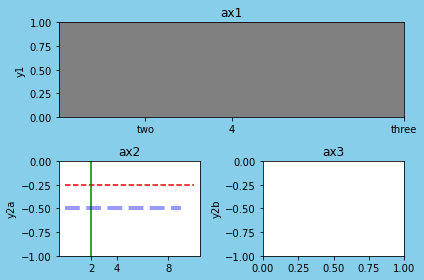

In [297]:
"""add_subplotの設定"""
fig = plt.figure(figsize=(6, 4), facecolor='skyblue', tight_layout=True)
ax1 = fig.add_subplot(211, title='ax1', fc='gray', ylabel='y1',
                      xticks=[2, 4, 8], xticklabels=['two', '4', 'three'])
ax2 = fig.add_subplot(223, title='ax2', xticks=[2, 4, 8], ylim=(-1, 0), ylabel='y2a')
ax3 = fig.add_subplot(224, title='ax3', sharey=ax2, ylabel='y2b')

# 補助線の例
ax2.plot([-0.5]*10, linestyle="dashed", c="b", linewidth=4., alpha=0.4)
ax2.hlines([-0.25], 0, 10, "r", linestyles="dashed")
ax2.vlines([2.], -1., 10, "g", linestyles="solid")

plt.show()
plt.close()
# fig.savefig('2-1_b.png', facecolor=fig.get_facecolor())

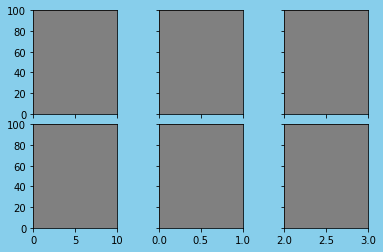

In [279]:
"""subplotの設定"""
fig, axes = plt.subplots(2, 3, figsize=(6, 4), facecolor='skyblue',
                         sharex='col', sharey=True,
                         subplot_kw=dict(facecolor='gray'))
axes[0, 0].set_xlim(0, 10)  #一番左上のグラフのx軸の範囲を0～10に設定
axes[1, 2].set_xlim(2, 3)  #一番右下のグラフのx軸の範囲を2～3に設定
axes[0, 1].set_ylim(0, 100)  #上段中央のグラフのy軸の範囲を0～100に設定

# グラフ間の隙間サイズ調整
fig.subplots_adjust(wspace=0.5, hspace=0.1)

plt.show()
plt.close()

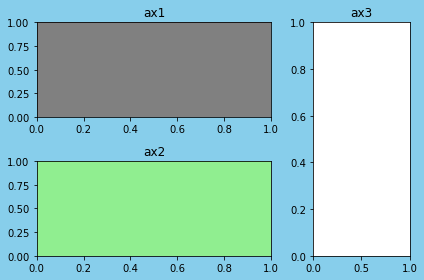

In [273]:
"""GridSpecの設定

グラフの大きさ(配置)をスライスで設定できる。

"""
fig = plt.figure(figsize=(6, 4), facecolor='skyblue', tight_layout=True)
gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, 0:2], title='ax1', facecolor='gray')
ax2 = fig.add_subplot(gs[1, 0:2], title='ax2', facecolor='lightgreen')
ax3 = fig.add_subplot(gs[:, 2], title='ax3')
plt.show()
plt.close()

In [127]:
# プロット用データの作成
x = np.linspace(0, 9, 20)
y1 = np.array([np.random.randint(0, 10) for i in range(20)])
y2 = np.array([np.random.randint(15, 30) for i in range(20)])
y3 = np.array([np.random.randint(20, 30) for i in range(20)])
y4 = np.array([np.random.randint(30, 50) for i in range(15)])
y5 = np.array([np.random.randint(40, 48) for i in range(15)])

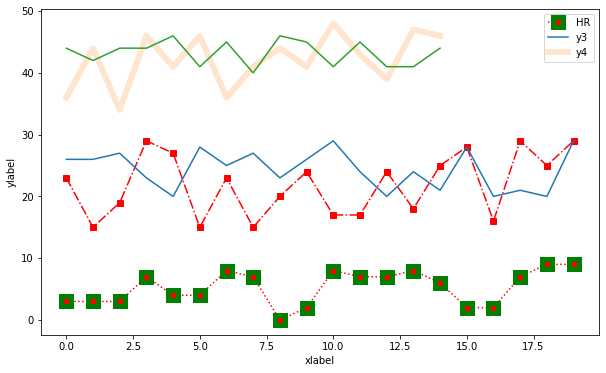

In [128]:
"""折れ線
[引数]
label           ：プロットのラベル。
color           ：折れ線の色。cでも可。
dashes          ：折れ線の実線部分と空白部分の長さをリストで指定。
linestyle       ：折れ線の線種。lsでも可。dashesが指定されていると無効。
linewidth       ：折れ線の太さ。lwでも可。
alpha           ：透明度を0～1で指定。
zorder          ：オブジェクトが重なっていた時この値が大きい方が前面に描画される。
marker          ：マーカーの形状。Noneでマーカーなし。
markersize      ：マーカーのサイズ。msでも可。
markerfacecolor ：マーカーの色。mfcでも可。
markeredgewidth ：マーカーの縁の太さ。mewでも可。
markeredgecolor ：マーカーの縁の色。mecでも可。
"""
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, xlabel='xlabel', ylabel='ylabel')
ax.plot(y1, 'rs:', label='HR', ms=10, mew=5, mec='green')
ax.plot(y2, c='r', marker='s', linestyle='-.')
ax.plot(y3, label='y3')
ax.plot(y4, label='y4', linewidth=6, alpha=0.2)
ax.plot(y5)
plt.legend()
plt.show()
plt.close()

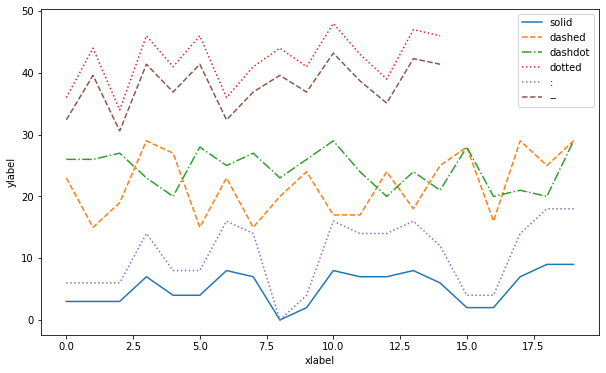

In [129]:
"""折れ線続き
[引数]
linestyle       ：折れ線の線種。lsでも可。dashesが指定されていると無効。
linewidth       ：折れ線の太さ。lwでも可。
"""
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, xlabel='xlabel', ylabel='ylabel')
ax.plot(y1, linestyle = "solid", label = "solid")
ax.plot(y2, linestyle = "dashed", label = "dashed")
ax.plot(y3, linestyle = "dashdot", label = "dashdot")
ax.plot(y4, linestyle = "dotted", label = "dotted")
ax.plot(y1*2.0, linestyle = ":", label = ":")
ax.plot(y4*0.9, linestyle = "--", label = "--")
plt.legend()
plt.show()
plt.close()

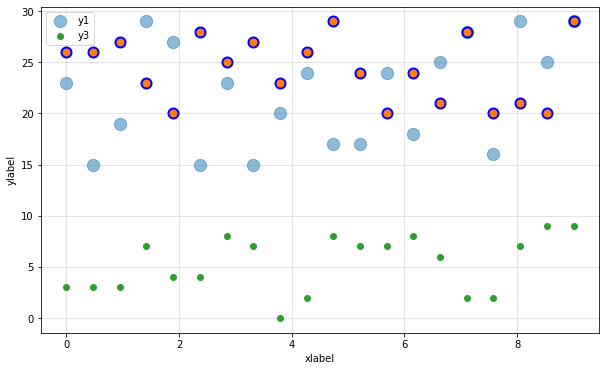

In [130]:
"""散布図
[引数]
size            ：マーカーのサイズ。s。
color           ：マーカーの色。c。
linewidth       ：縁の太さ。lw。
edgecolors      ：マーカーの縁の色。デフォルトは'face'（cと同じ色）。
alpha           ：透明度を0～1で指定。
zorder          ：表示順の設定。オブジェクトが重なっていた時この値が大きい方が前面に描画される。
"""
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, xlabel='xlabel', ylabel='ylabel')
ax.scatter(x, y2, s=150, label='y1', alpha=0.5)
ax.scatter(x, y3, s=100, linewidth=2, edgecolors="b")
ax.scatter(x, y1, label="y3")
ax.grid(c='gainsboro', zorder=9)
ax.set_axisbelow(True)
plt.legend()
plt.show()
plt.close()

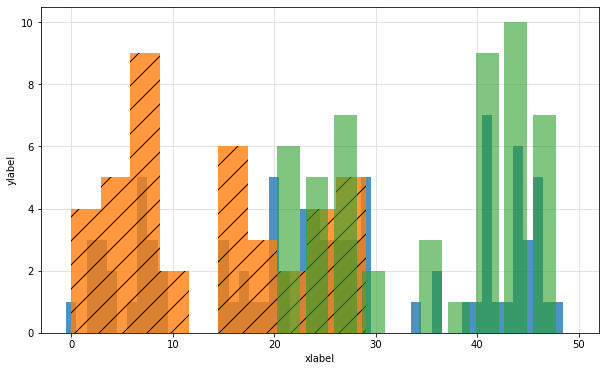

In [227]:
"""ヒストグラム
[引数]
bins        ：ビンの本数。デフォルトは10。
range       ：対象範囲を(float, float)で指定。デフォルトは(x.min(), x.max())。
density     ：True：正規化する。ヒストグラムの面積を1にする。
cumulative  ：True：グラフを累積分布にする。
rwidth      ：各棒の幅を数値または、配列で指定。
log         ：True：縦軸を対数目盛で表示。
histtype    ：グラフの種類（下記参照）。デフォルトは'bar'。
            ：'step'：塗りつぶしなしの線で出力。
            ：'stepfilled'：塗りつぶしありの線で出力。
            ：'barstacked'：積み上げヒストグラム。
stacked     ：True：積み上げヒストグラム。
align       ：ビンの横位置。デフォルトは'mid'（区間の中央）。他は'left'，'right'。
orientation ：デフォルトは'vertical'。'horizontal'にすると横棒になる。
color       ：リストで系列毎に指定可。
label       ：リストで系列毎に指定可。
facecolor   ：ビンの色。fcでも可。colorとは違いリスト不可（全系列同色）。
hatch       ：ビンの網掛け。
linewidth   ：ビンの縁の太さ。lwでも可。
edgecolor   ：ビンの縁の色。ecでも可。
alpha       ：透明度を0～1で指定。
zorder      ：オブジェクトが重なっていた時この値が大きい方が前面に描画される。
"""
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, xlabel='xlabel', ylabel='ylabel')
y_hist0 = np.hstack([y1, y2, y3, y4, y5])
y_hist1 = np.hstack([y1, y2])
y_hist2 = np.hstack([y3, y4, y5])
n0, bins0, patches0 = ax.hist(y_hist0, range=(0, 50), bins=50, rwidth=1.0, align="left", density=False, alpha=0.8)
n1, bins1, patches1 = ax.hist(y_hist1, alpha=0.8, hatch='/')
n2, bins2, patches2 = ax.hist(y_hist2, alpha=0.6, rwidth=0.8)
# 戻り値について
# ｎ:各ビンの高さの配列(小さい方から)、bins：境界の配列
ax.grid(c='gainsboro', zorder=9)
ax.set_axisbelow(True)
plt.show()
plt.close()

[[0.08900524 0.21465969 0.19895288 0.16753927 0.17277487 0.08900524
  0.04188482 0.02617801 0.         0.         0.        ]
 [0.00510204 0.00510204 0.01530612 0.05102041 0.15816327 0.12755102
  0.19897959 0.17857143 0.13265306 0.09183673 0.03571429]] [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
2.0 0.0 11.0


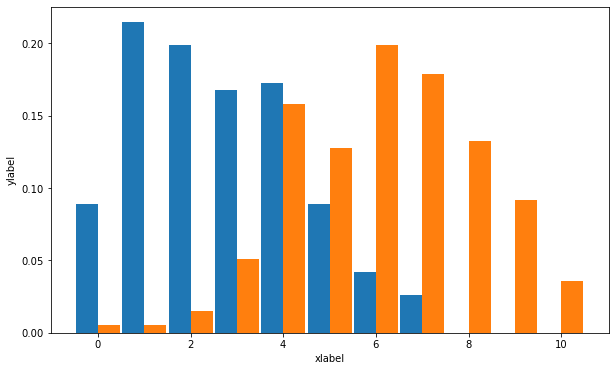

In [225]:
"""ヒストグラム2
ビンの調整
"""
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, xlabel='xlabel', ylabel='ylabel')
# 平均, 標準偏差, 生成数
x = np.random.normal(3, 2, 200)
y = np.random.normal(7, 2, 200)
n, bins, patches = plt.hist([x, y], range=(0, 11), bins=11, rwidth=0.95, align='left', density=True)
print(n, bins)
print(np.sum(n), np.min(bins), np.max(bins))
plt.show()
plt.close()